# Balance in League of Legends Matchmaking

In [14]:
# imports
import pandas as pd
import split
import seaborn as sns
from scipy import stats
import modeling as md
from sklearn.neighbors import KNeighborsClassifier

# constants
folder = 'riot_api_data/'
target_var = 'win'
alpha = 0.05


## Project Overview:

### What?
> * Determine if the ranked matchmaking system for league of legends is fair.
> * Discover and recommend features that could be predictive of win rate advantages/disadvantages.

### How?
> * Find key drivers of winrate using aggregate player game history.
> * Engineer features to include potential advantages that a team could have before a game starts, such as winrate discrepencies (on role, champion, and session win rates), total number of players on each team that are on their most experienced roles, and whether each team has their jungle on role versus off role.

### Why?:

> * Competitive games are centered around the idea of competitive integrity. The goal of a ranked matchmaking system is to, within a reasonable amount of time, give both teams an even chance to win. Being able to correctly predict which team is going to win over 50% percent of the time indicates an imbalance that gives one team an unfair advantage over the other, and identifying the key drivers of that imbalance could help Riot Games make adjustments to matchmaking parameters to create more fair and competitive games.




# Executive Summary:
### Key Drivers:

### Modeling:
* Model was able to guess with 50% accuracy on test on which team was going to win.
* Did not beat baseline accuracy.

### Takeaways/Recommendations:
Explore other datapoints and potential features to find drivers of winning, historical data did not play a significant role in deciding who would win a game.


# Acquire Data

**Acquire Goal:** Use the Riot API to collect data on a matchmade lobby and the game history of each player in a lobby.

In [15]:
# List of Match IDs to collect data on
"""game_nums = [4169229565, 4169245913, 4035079604, 4035079613, 4035079665, 4035079666, 4035079668, 4035079686, 4035079692, 4035079696, 4035079700, 4035079718, 4035079733, 4035089527, 4035089567, 4035089568, 4035089573, 4035089579, 4035089582, 4035089606, 4035089614, 4035089624, 4035089626, 4035089632, 4035089659, 4035089661, 4035089662, 4035089666, 4035089690, 4035089707, 4035089711, 4035089723, 4035089726, 4035098534, 4035098537, 4035098619, 4035098637, 4035098655, 4035098658, 4035098660, 4035098675, 4035098702, 4035098709, 4035098711, 4035098724, 4035098732, 4035098733, 4035098734, 4035098778, 4035098785, 4035098786, 4035098799, 4035098805, 4035098818, 4035098855, 4035098860, 4035098870, 4035098873, 4035098879, 4035098884, 4035098890, 4035098893, 4035098897, 4035098898, 4035098913, 4035098925, 4035098937, 4035098938, 4035098957, 4035098967, 4035098968, 4035098977, 4035098999, 4035099000, 4035099001, 4035099011, 4035099026, 4035099035, 4035099036, 4035099037, 4035099057, 4035099061, 4035099064, 4035099065, 4035099069, 4035099089, 4035099107, 4035099109, 4035099114, 4035099129, 4035099132, 4035099133, 4035099162, 4035099172, 4035099182, 4035099192, 4035099203, 4035099220, 4035099226, 4035099230, 4035099234, 4035099239, 4035099242, 4035099246, 4035099247, 4035099256, 4035099257, 4035099262, 4035099279, 4035099329, 4035099335, 4035099363, 4035099409, 4035099421, 4035099425, 4035099437, 4035099446, 4035099447, 4035099456, 4035099458, 4035099496, 4035099508, 4035099514, 4035099519, 4035099527, 4035099540, 4035099552, 4035099561, 4035099570, 4035099578, 4035099585, 4035099593, 4035099606, 4035099619, 4035099623, 4035099626, 4035099643, 4035099652, 4035099674, 4035099694, 4035099705, 4035099710, 4035099721, 4035099731, 4035099734, 4035108167, 4035108182, 4035108202, 4035108225, 4035108251, 4035108252, 4035108255, 4035108260, 4035108265, 4035108271, 4035108291, 4035108299, 4035108311, 4035108330, 4035108345, 4035108355, 4035108366, 4035108372, 4035108405]"""

# The number to start data collection in the function,
# This process had to be restarted many times due to 
# API rate limiting, this is a way to start where left off.
"""error_num = 4169229565"""

# Index number of error_num in above list so I can grab that match
# and every game after.
"""game_nums.index(error_num)
gamma = ['NA1_'+str(num) for num in game_nums[game_nums.index(error_num):]]"""

# Collect both the lobby and player histories of each lobby/match_id.
"""for gam in gamma:

    print('sleeping')
    time.sleep(25)   # prevent exceeding rate limit
    all_individual_stats.lobby_and_player_stats(gam)"""

# Makes several dfs of stats that can be examined. 
# We're going to load the all_team_data for this project, 
# which is aggregate team data for each team in each lobby.
"""final_df, all_blue, all_red, all_team_data = all_individual_stats.aggregate_all_stats()"""

'final_df, all_blue, all_red, all_team_data = all_individual_stats.aggregate_all_stats()'

***Code above commented out to show how data was collected, but does not run unless you have your own api key.***

In [3]:
df = pd.read_csv(folder+'aggregates.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       112 non-null    int64  
 1   total_on_role               112 non-null    int64  
 2   mean_champ_win_rate         107 non-null    float64
 3   mean_role_win_rate          109 non-null    float64
 4   jg_on_role                  112 non-null    int64  
 5   mean_session_games          108 non-null    float64
 6   aggregate_session_win_rate  108 non-null    float64
 7   win                         112 non-null    float64
 8   match_id                    112 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 8.0+ KB


In [4]:
# Find total percentage of null values
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

0.05357142857142857

## Acquire keypoints:

> * Some players didn't have a previous game history. Will affect all role and winrate features for that player.
> * Small amount of null values, can drop them in prepare.
> * All datatypes look how they should.

# Prepare:

### Prepare Goals:
* Clean data, drop missing values
* split data into train, validate and test sets
* Ensure data is compatible for modeling.

### Prepare/Cleaning:

In [5]:
# drop nulls
df = df.dropna()
df.head()

,index,total_on_role,mean_champ_win_rate,mean_role_win_rate,jg_on_role,mean_session_games,aggregate_session_win_rate,win,match_id
0,0,0,-0.101898,-0.105035,-1,3.0,-0.111111,-1.0,NA1_4035079692
1,0,0,-0.183252,-0.090136,0,-0.6,-0.011364,-1.0,NA1_4035098724
2,0,1,-0.051555,-0.183364,0,3.2,0.378788,1.0,NA1_4035098873
3,0,0,0.021739,0.200000,0,0.0,0.400000,1.0,NA1_4035079686
4,0,-1,0.121032,0.020727,0,0.6,-0.214286,-1.0,NA1_4035099065


### Data Splitting:

In [6]:
train, validate, test = split.train_validate_test_split(df.drop(columns=['match_id','index']), target_var)
train.head(3)

,total_on_role,mean_champ_win_rate,mean_role_win_rate,jg_on_role,mean_session_games,aggregate_session_win_rate,win
49,0,-0.186813,-0.192353,1,-82.0,0.212121,-1.0
11,1,0.118095,-0.214851,1,0.6,0.257143,1.0
14,1,0.555556,-0.293561,0,1.0,-0.291667,1.0


### Peparation Takeaways:

* Null Values dropped
* Code split into training, validate and test splits. 

# Exploration:

**Exploration Goals:**
   * find drivers of winning
   * Get insight into how player history affects their chances of winning.
   * Visualize and hypothesis test to understand our theories.
   * Use results to make conclusions and recommendations.

## Question 1: Is the teams' mean historical winrate on their champions related to winning the current game?

<AxesSubplot:xlabel='mean_champ_win_rate', ylabel='Count'>

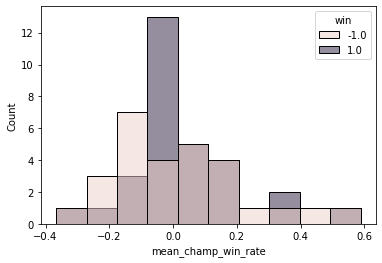

In [7]:
# histogram of mean champ win rate split by win status
sns.histplot(x=train.mean_champ_win_rate, hue=train.win)

### Takeaways:
* Mean champion win rate looks normally distributed, meets the assumptions for T-Testing.
* There doesn't seem to be a consistent pattern between mean champ win rate and which team wins.

### Hypothesis Testing:
**Null Hypothesis:** Historical Champion Win rate has significant relation to winning.
**Alternative Hypothesis:** Historical Champion Win rate has no significant relation to winning.

In [8]:
# Gathering test statistics and p value
t, p = stats.ttest_ind(train.win, train.mean_champ_win_rate)

if p < alpha:
    print('We reject the Null Hypothesis that champion win rate has no significant relation to winning.')
else:
    print('We accept the Null Hypothesis that champion win rate has no significant relation to winning.')

We accept the Null Hypothesis that champion win rate has no significant relation to winning.


### Takeaway:
There is no evidence that historical champion win rate has a significant relation to the outcome of the current game.

## Question 2: Does having a jungle on role advantage affect winning?

<AxesSubplot:xlabel='jg_on_role', ylabel='Count'>

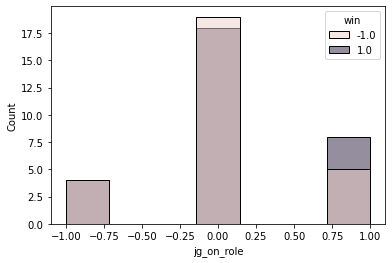

In [9]:
# violin plot of jg_on_role 
sns.histplot(x=train.jg_on_role, hue=train.win)

### Hypothesis Testing:
**Null Hypothesis:** Jungle on role does not have a significant relation to winning/losing.
**Alternative Hypothesis:** Jungle on role does have a signiifcant relation to winning/losing.

In [10]:
# chi square testing
observed = pd.crosstab(train.win, train.jg_on_role)
chi, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print('We reject the Null Hypothesis that Jungle On Role has no significant relation to winning/losing.')
else:
    print('We accept the Null Hypothesis.')

We accept the Null Hypothesis.


### Takeaway:
* Jungle advantage does not seem to have a significant change for winning except potentially for blue side (jg_on_role==1).
* More data is probably required to decided if this is noise or not.
* Chi square testing let's us accept the Null Hypothesis that Jungle On Role does not have a statistically significant relation to winning/losing.

# Model And Evaluate:

In [11]:
# set baseline
base_guess = train.win.value_counts().idxmax()

md.Results.baseline = (train.win == base_guess).mean()
print(f'Baseline accuracy is '
      f'win == 1: {round(md.Results.baseline * 100,2)}%')

Baseline accuracy is win == 1: 51.72%


If I predicted that every team would win, I would have an accuracy of 51.7%, which is close to the theoretical ideal of 50%.
This is the baseline accuracy that I'm trying to outperform.


I'm going to try Logistic Regression, Random Forests, Decision Trees, and KNearest Neighbors to try and create a predicitve classification model.

I've written functions to adjust the parameters for the following:

* **Decision Trees:**
  * depth
* **Random Forests:**
  * depth
  * min samples leaf
* **KNearestNeighbor:**
  * n_neighbors
  * weights (uniform, distance)
* **Logistic Regression:**
  * C
  * solver (lbgfs, liblinear)
  * fit_intercept, intercept_scaling
  
*Random State set to 123 where possible.*

## Modeling Code:

In [12]:
# create iterations of models, group them into Result objects that I made in modeling.py
dt_mods, rf_mods, knn_mods, lr_mods = md.all_reports(train, validate, test, target_var)
md.Results.total_summary[['model_type', 'n_nearest_neighbor', 'train_accuracy', 'validate_accuracy']].sort_values(by='validate_accuracy', ascending=False).head()

,model_type,n_nearest_neighbor,train_accuracy,validate_accuracy
10,knn_uniform,11.0,0.586207,0.615385
24,knn_distance,11.0,1.000000,0.615385
4,random_forests,NaN,0.689655,0.576923
27,knn_distance,14.0,1.000000,0.576923
26,knn_distance,13.0,1.000000,0.576923


## Takeaways from modeling:
* All models beat baseline, althogh knn_distance seems to be way overfit.
* knn_uniform has the best balance between train and validate, while actually performing better on validate.
* My best knn_uniform model performed with **61.54%** accuracy on our validate set. This model beats baseline accuracy by **21.38%** and will be the model I use on the test set.

## Test Best Model

In [13]:
knn_uniform = KNeighborsClassifier(n_neighbors=11, weights='uniform')

x_train = train.drop(columns=[target_var])
y_train = train[target_var]

x_validate = validate.drop(columns=[target_var])
y_validate = validate[target_var]

knn_uniform = knn_uniform.fit(x_train, y_train)

X_test = test.drop(columns=[target_var])
Y_test = test[target_var]

y_pred_test = knn_uniform.predict(X_test)

accuracy = knn_uniform.score(X_test, Y_test)
print(f'Test Accuracy: {round(accuracy * 100, 2)}%')

accuracy = knn_uniform.score(x_validate, y_validate)
print(f'Validate Accuracy: {round(accuracy * 100, 2)}%')

accuracy = knn_uniform.score(x_train, y_train)
print(f'Train Accuracy: {round(accuracy * 100, 2)}%')

Test Accuracy: 68.18%
Validate Accuracy: 61.54%
Train Accuracy: 58.62%


### Takeaway:
Test accuracy **68.18%** accurate, beating our baseline of 51.7% by **32.5%**. The variability between test, validate, and train accuracies leads me to believe that I need more data to train and test on.

## Conclusions & Recommendations

**Conclusion:** Using the features of team champion win rate, team on role winrate, total number of on role players, and session winrate, I was ultimately unable to find any statistical significance affecting winrate.

### Model:
* Knn_uniform performed with an accuracy of **68.18%** accuracy, beating baseline by **32.5%**. Again, I belive more data is needed before taking these accuracies at face value.

### Recommendations:
* Further exploration and feature engineering can be conducted to find drivers of win rate that are statistically significant. 
* Because of the high variability in train/validate/test accuracies and the smaller amount of data available, I wouldn't use this model to make outcome predictions and would put priority on acquiring more data.